In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from matplotlib import pyplot as plt

US= pd.read_csv("../data/USArrests.csv")

In [2]:
US.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
US.columns=['State','Murder','Assault','UrbanPop','Rape']
labelList=US.State.tolist()

In [5]:
US.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


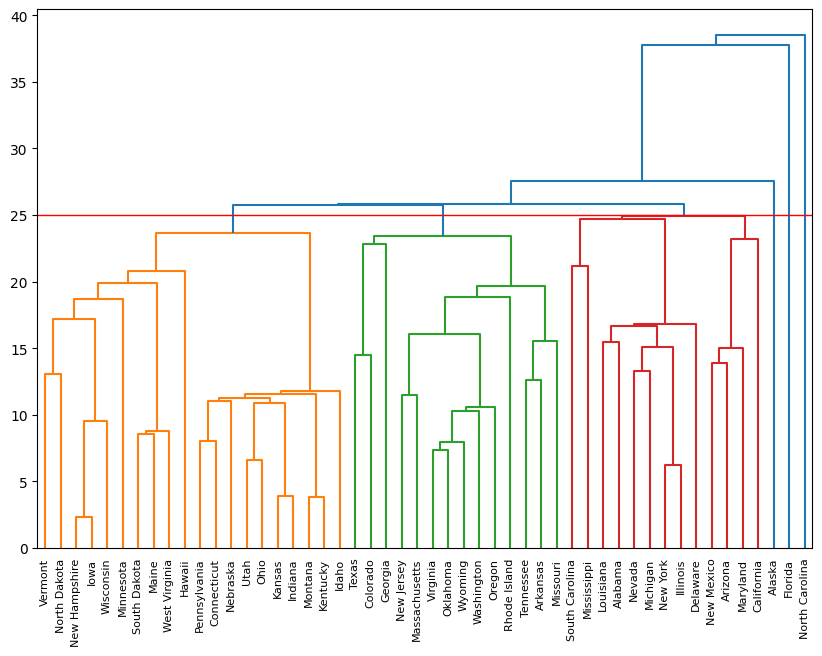

In [7]:
single=linkage(US.iloc[:,1::],metric='euclidean', method='single')

plt.figure(figsize=(10,7))
dendrogram(single, orientation='top', labels=labelList, distance_sort='descending', color_threshold=25,show_leaf_counts=True)
plt.axhline(y=25,color='r',linewidth=1)
plt.show()

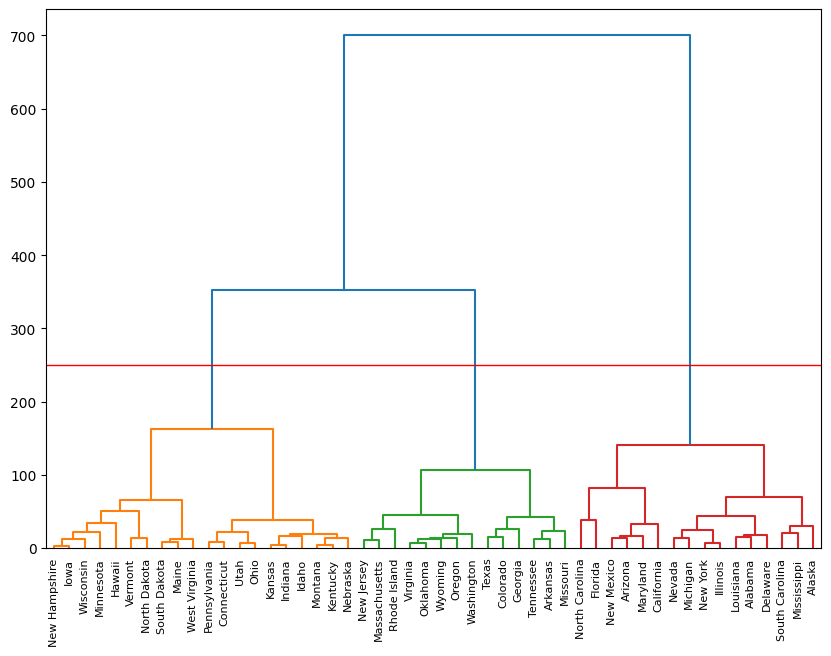

In [8]:
ward=linkage(US.iloc[:,1::], metric='euclidean', method='ward')
plt.figure(figsize=(10,7))
dendrogram(ward, orientation='top', labels=labelList, distance_sort='descending',color_threshold=250,show_leaf_counts=True)
plt.axhline(y=250, color='r', linewidth=1)
plt.show()

In [9]:
assignments=fcluster(ward,20,'distance')
assignments

array([ 4,  3,  7, 11,  8, 13, 20,  4,  9, 14, 25, 18,  5, 18, 23, 18, 18,
        4, 21,  7, 16,  6, 24,  1, 12, 18, 18,  6, 23, 16,  7,  5, 10, 22,
       19, 15, 15, 20, 17,  2, 21, 11, 13, 19, 22, 15, 15, 21, 23, 15],
      dtype=int32)

In [13]:
US['cluster']=assignments

In [14]:
US.groupby('cluster').mean()

TypeError: agg function failed [how->mean,dtype->object]